# 1 Multi-class Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
from utils import *

## 1.1 Dataset

In [2]:
data = loadmat('../data/ex3data1.mat')
y = data['y']
y %= 10 # fixes “0” digit is labeled as “10”
y = np.squeeze(y) # shape [N,1] -> [N,]
X = data['X'] 
X = np.append(np.ones([X.shape[0],1]),X, axis=1) # add bais

## 1.2 Visualizing the data

6


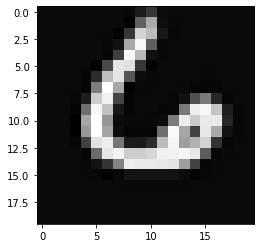

In [3]:
img_num = np.random.randint(len(y))
img = np.reshape(X[img_num, 1:], [20,20]).T
print(y[img_num])
plt.imshow(img, cmap='gray')
plt.show()

## 1.3 Vectorizing Logistic Regression
all the code is in utils.py

## 1.4 One-vs-all Classification

In [8]:
K = 10
init_thetaM = np.zeros([K, X.shape[1]])
thetaM = one_vs_all(init_thetaM, X, y, K)

/home/ofir/peronal_projects/DS_training/Coursera-Machine-learning-python/ex3/code/utils.py:36: RuntimeWarning: divide by zero encountered in log
  cost = (-y * np.log(h) - (1-y) * np.log(1 - h)).sum() / len(y)
/home/ofir/peronal_projects/DS_training/Coursera-Machine-learning-python/ex3/code/utils.py:36: RuntimeWarning: invalid value encountered in multiply
  cost = (-y * np.log(h) - (1-y) * np.log(1 - h)).sum() / len(y)
/home/ofir/peronal_projects/DS_training/Coursera-Machine-learning-python/ex3/code/utils.py:18: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [9]:
acc = ((X.dot(thetaM.T).argmax(axis=1)-y)==0).sum()/len(y)
print('The accuracy is: ' + str(acc))

The accuracy is: 0.9906
